<a href="https://colab.research.google.com/github/Isaackante/Waste-Recycle-Image-Classifiication/blob/main/Pytorch_Waste_Recycle_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision.transforms as tt
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/techsash/waste-classification-data'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sirisaackante
Your Kaggle Key: ··········


100%|██████████| 427M/427M [00:23<00:00, 19.0MB/s]


In [ ]:
import os

In [ ]:
data_dir = './waste-classification-data/DATASET'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/TRAIN")
print(classes)

['TRAIN', 'TEST']
['R', 'O']


In [ ]:
import os

In [ ]:
os.listdir(data_dir)

['TRAIN', 'TEST']

In [ ]:
data = ImageFolder(data_dir, transform = ToTensor())

In [ ]:
dataset = ImageFolder(data_dir+'/TRAIN', transform=ToTensor())

##Explore Data

In [ ]:
dataset

Dataset ImageFolder
    Number of datapoints: 22564
    Root location: ./waste-classification-data/DATASET/TRAIN
    StandardTransform
Transform: ToTensor()

In [ ]:
len(dataset)

22564

In [ ]:
dataset[0]

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 0)

In [ ]:
dataset.classes

['O', 'R']

In [ ]:
image, label = dataset[0]
print(image.shape, label)
image

torch.Size([3, 242, 208]) 0


tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [ ]:
def show_image(image, label):
  print('label:', dataset.classes[label])
  plt.imshow(image.permute(1,2,0))

label: O


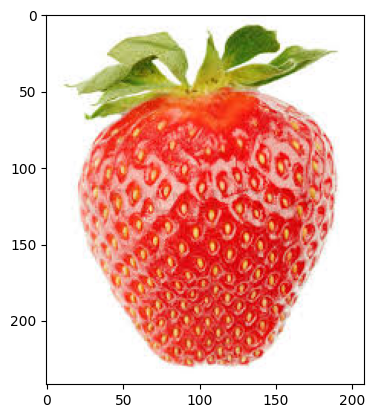

In [ ]:
show_image(*dataset[0])

label: R


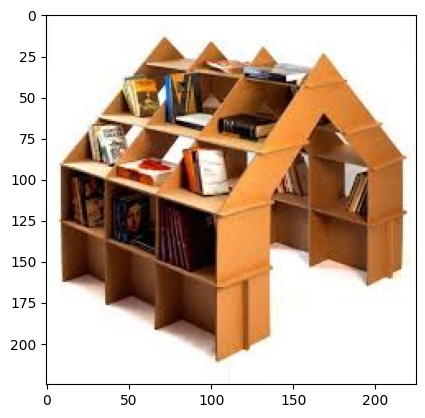

In [ ]:
show_image(*dataset[14000])

label: O


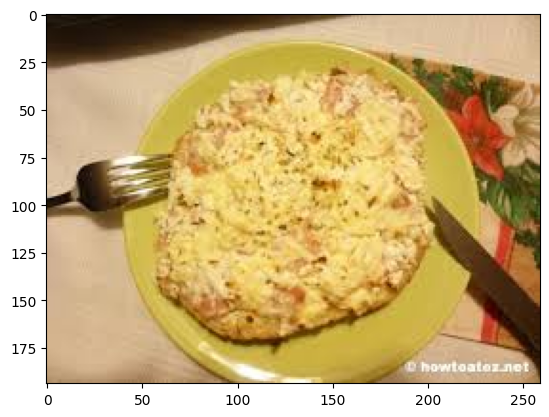

In [ ]:
show_image(*dataset[10000])

In [ ]:
import torchvision.transforms as tt

dataset = ImageFolder(data_dir+'/TRAIN',tt.Compose([tt.Resize(64),
                                           tt.RandomCrop(64),
                                           tt.ToTensor()]) )
# data = ImageFolder(data_dir, tt.Compose([tt.Resize(64),
#                                            tt.RandomCrop(64),
#                                            tt.ToTensor()]) )

torch.Size([3, 64, 64]) 0


tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

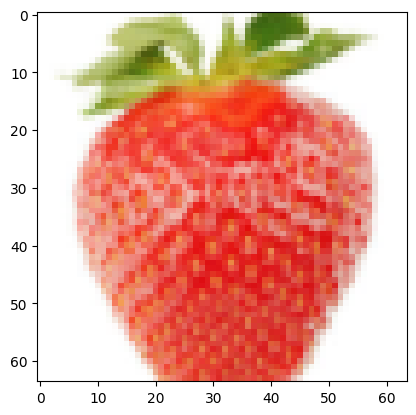

In [ ]:
image, label = dataset[0]
print(image.shape, label)
plt.imshow(image.permute(1,2,0))
image

label: O


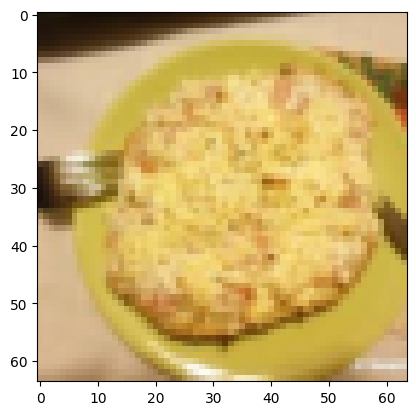

In [ ]:
show_image(*dataset[10000])

##Training and Validation Datasets

In [ ]:
val_pct = 0.1
val_size = int(val_pct * len(dataset))
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(20308, 2256)

In [ ]:
batch_size = 128

In [ ]:
batch_size = 128
train_dl = DataLoader(train_ds, batch_size = batch_size, shuffle = True, num_workers = 4, pin_memory= True)
val_dl = DataLoader(val_ds, batch_size = batch_size, num_workers = 4,pin_memory= True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images,labels in dl:
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow= 16).permute(1, 2, 0))
    break

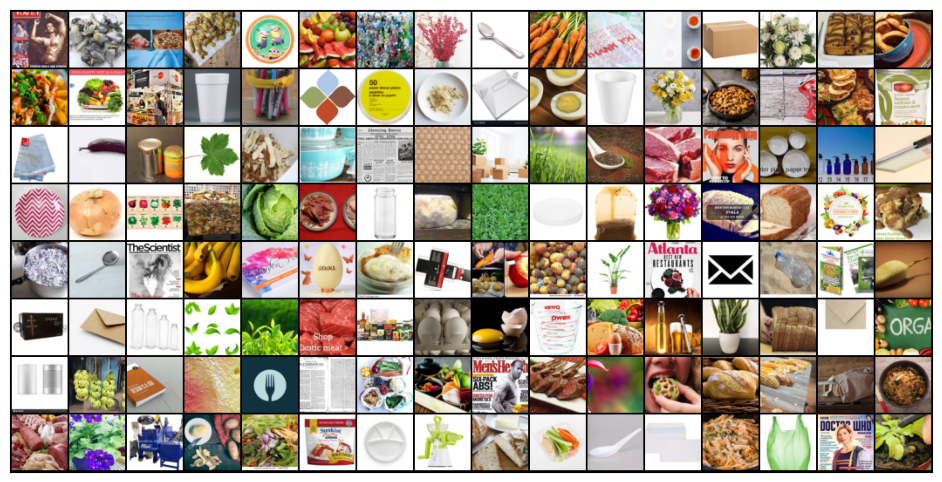

In [ ]:
show_batch(train_dl)

##Use GPU

In [ ]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
image, label = dataset[0]

In [ ]:
image.device

device(type='cpu')

In [ ]:
image_gpu = to_device(image, device)
image_gpu.device

device(type='cuda', index=0)

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

## Model Utilities

In [ ]:
def accuracy(outputs,labels):
  _, preds = torch.max(outputs, dim = 1)
  return torch.tensor(torch.sum(preds ==labels).item()/ len(preds))

In [ ]:
class ImageClassificationBase(nn.Module):
  def training_step(self,batch):
    images,labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    return loss

  def validation_step(self,batch):
    images,labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    acc = accuracy(out,labels)
    return {'val_loss': loss.detach(), 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_accs = torch.stack(batch_accs).mean()
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_accs.item()}

  def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

#Model

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
              nn.BatchNorm2d(out_channels),
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()

        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))

        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))

        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1),
                                        nn.Flatten(),
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))

    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

NameError: ignored

In [ ]:
model = to_device(ResNet9(3, len(dataset.classes)), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
model.conv1[0].weight.device

device(type='cuda', index=0)

In [ ]:
for batch in train_dl:
  images, labels = batch
  print(images.shape)
  print(images.device)
  preds = model(images)
  print(preds)
  break

torch.Size([128, 3, 64, 64])
cuda:0
tensor([[-2.9999,  1.8669],
        [-4.0348,  1.9760],
        [-3.8358,  2.7253],
        [-4.1840,  2.9661],
        [-3.6618,  2.8777],
        [-5.0600,  1.2454],
        [-3.0729,  5.0728],
        [-1.8911,  2.9251],
        [-3.2085,  1.1991],
        [-4.4511,  3.2980],
        [-4.1575,  2.2924],
        [-5.2627,  1.9436],
        [-5.3416,  7.2478],
        [-3.7754,  3.3183],
        [-2.3286,  2.2657],
        [-5.3977,  2.7895],
        [-1.9474,  1.4060],
        [-5.6903,  2.2374],
        [-1.8325,  2.3794],
        [-2.8237,  2.7033],
        [-6.0541,  2.7294],
        [-5.5495,  1.9125],
        [-1.7809,  3.2569],
        [-2.7374,  3.5701],
        [-1.5574,  2.8464],
        [-3.8422,  4.5214],
        [-2.9754,  2.1702],
        [-4.6995,  1.9750],
        [-2.8441,  3.1369],
        [-4.5048,  2.8567],
        [-6.1956,  2.1844],
        [-2.1931,  1.0505],
        [-3.3326,  4.5955],
        [-4.6568,  3.5596],
        [-2.

In [ ]:
history = [evaluate(model, val_dl)]
history

[{'val_loss': 0.6957319378852844, 'val_acc': 0.45086807012557983}]

In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [ ]:
history += fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.5110, val_loss: 0.3984, val_acc: 0.8243
Epoch [1], train_loss: 0.3614, val_loss: 0.3260, val_acc: 0.8698
Epoch [2], train_loss: 0.3401, val_loss: 0.4679, val_acc: 0.7944
Epoch [3], train_loss: 0.3163, val_loss: 0.2977, val_acc: 0.8801
Epoch [4], train_loss: 0.2993, val_loss: 0.2882, val_acc: 0.8829
Epoch [5], train_loss: 0.2941, val_loss: 0.2833, val_acc: 0.8916
Epoch [6], train_loss: 0.2791, val_loss: 0.2757, val_acc: 0.8957
Epoch [7], train_loss: 0.2730, val_loss: 0.3635, val_acc: 0.8402
Epoch [8], train_loss: 0.2752, val_loss: 0.2719, val_acc: 0.8947
Epoch [9], train_loss: 0.2577, val_loss: 0.2675, val_acc: 0.9010


##Plot

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

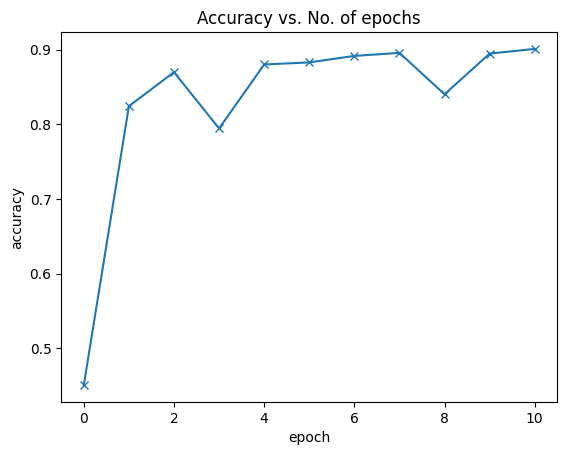

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

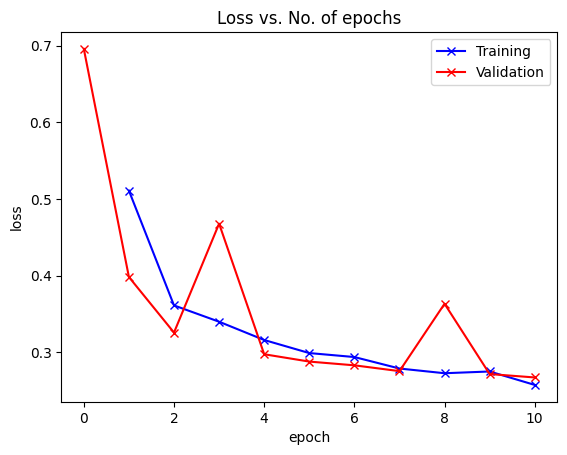

In [ ]:
plot_losses(history)

In [ ]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

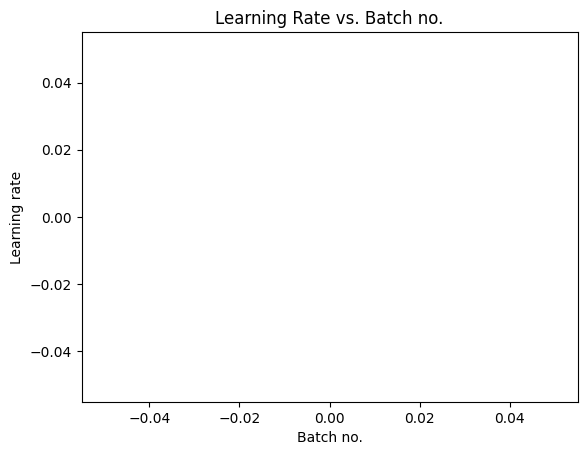

In [ ]:
plot_lrs(history)

##Test on Individual images

In [ ]:
def predict_image(img, mode, classes):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

Label: R , Predicted: R


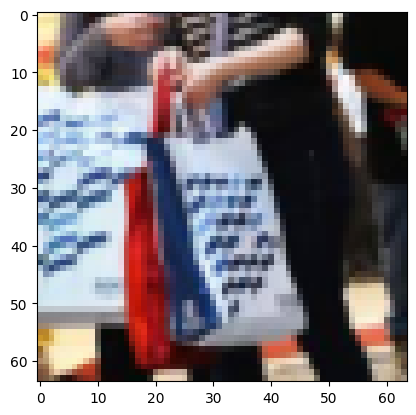

In [ ]:
img, label = val_ds[100]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model, dataset.classes))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Label: O , Predicted: O


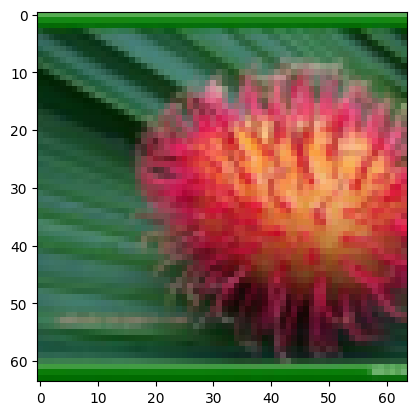

In [ ]:
img, label = val_ds[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model, dataset.classes))

Label: R , Predicted: R


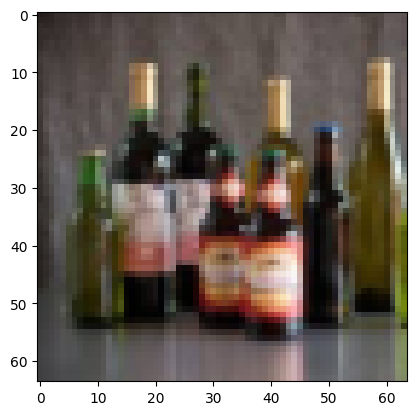

In [ ]:
img, label = val_ds[2002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model, dataset.classes))

Label: O , Predicted: O


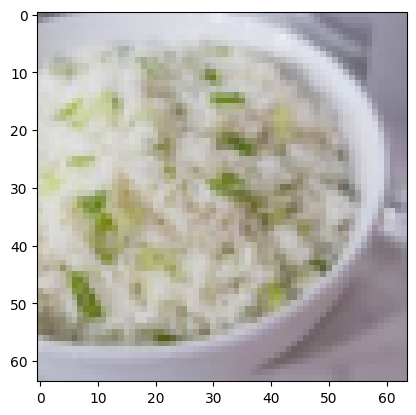

In [ ]:
img, label = val_ds[50]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model, dataset.classes))

#Save Model

In [ ]:
torch.save(model.state_dict(), 'Waste-Recycle-Model.pth')

In [ ]:
model32 = to_device(ResNet9(3, len(dataset.classes)), device)

## Load

In [ ]:
model32.load_state_dict(torch.load('Waste-Recycle-Model'))

<All keys matched successfully>

In [ ]:
evaluate(model32, val_dl)

{'val_loss': 0.2643384039402008, 'val_acc': 0.9006944298744202}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
